In [144]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt



def generate_x(F):
    return -math.log(1-F)

n = 25
sample = []
for i in range(n):
    sample.append(generate_x(random.random()))
sample = np.array(sample)
print('Выборка: \n', sample)

Выборка: 
 [0.36017087 1.03335894 0.74541896 0.20682078 1.08075247 5.44560042
 3.87421164 0.60922824 0.2690794  1.30690298 2.59202269 0.27893798
 1.02313492 1.37582499 0.43253829 2.49780679 0.98248496 0.99758018
 1.47268091 2.10921466 0.01203977 2.27171702 4.77795682 2.34322285
 0.16254212]


In [145]:
sample.sort()
print('Вариационный ряд: \n', sample)

Вариационный ряд: 
 [0.01203977 0.16254212 0.20682078 0.2690794  0.27893798 0.36017087
 0.43253829 0.60922824 0.74541896 0.98248496 0.99758018 1.02313492
 1.03335894 1.08075247 1.30690298 1.37582499 1.47268091 2.10921466
 2.27171702 2.34322285 2.49780679 2.59202269 3.87421164 4.77795682
 5.44560042]


In [163]:
def a_i(sample, i):
    res = 0
    for el in sample:
        res += el**i
    return res/len(sample)
    
    
def m_i(sample, a1, i):
    res = 0
    for el in sample:
        res += (el - a1)**2
    res /= len(sample)
    return res


print('Размах: ', sample[-1] - sample[0])
print('\nМедиана: ', (sample[-1] - sample[0])/2)

tmp = {}
max = 1
for el in sample:
    try:
        tmp[el] += 1
        if tmp[el] > max:
            max = tmp[el]
    except:
        tmp[el] = 1
if max == 1:
    print('\nМода: все элементы')
else:
    print('\nМода: ', end='')
    for key in b:
        if tmp[key] == max:
            print(key, end='')
            
            
a1 = a_i(sample, 1)
m3 = m_i(sample, a1, 3)
m2 = m_i(sample, a1, 2)
r = m3/pow(m2, 1.5)

print('\nКоэффициент асимметрии: ', r)

Размах:  5.433560651964924

Медиана:  2.716780325982462

Мода: все элементы

Коэффициент асимметрии:  0.7108861248230585



Эмпирическая функция распределения


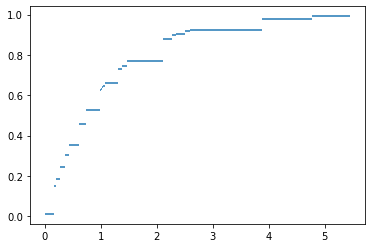

In [211]:
F = [1-pow(math.e, -x) for x in sample]
print('\nЭмпирическая функция распределения')

fig, ax = plt.subplots()

for i in range(n-1):
    ax.hlines(F[i], sample[i], sample[i+1])

plt.show()



Гистограмма


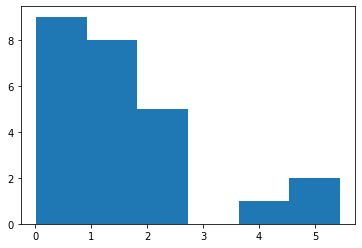

In [165]:
k = 1 + round(math.log2(n))

print('\nГистограмма')
plt.hist(sample, bins=k)
plt.show()



Boxplot


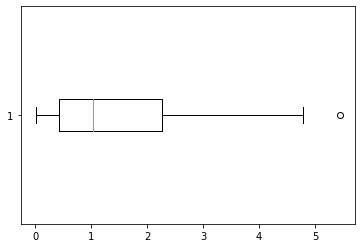

In [169]:
print('\nBoxplot')
plt.boxplot(sample, vert=0)
plt.show()


Ядерная оценка плотности распределения


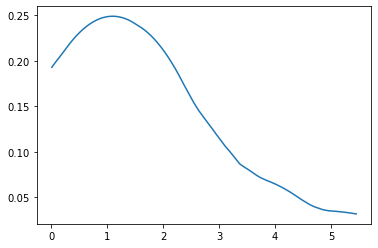

In [167]:
def nuclear(z, xi):
    y = (z-xi)/2.344
    if -1 < y and y < 1:
        return 0.75*(1-y*y)
    return 0

def nuclear_assessment(z):
    res = 0
    for i in range(n):
        res += nuclear(z, sample[i])
    return res/(n*2.344)


z, pz = [], []
i = sample[0]
while i < sample[-1]:
    pz.append(nuclear_assessment(i))
    z.append(i)
    i += 0.001

plt.plot(z, pz)
print('\nЯдерная оценка плотности распределения')
plt.show()




Bootstrap и Плотность распределения среднего арифметического элементов выборки


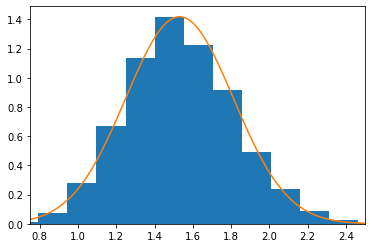

In [215]:
def arithmetic_mean_density(x, a1, a2):
    D = a2 - a1**2
    res = pow(math.e, -n*((x-a1)**2)/(2*D))
    return res*math.sqrt(n/(2*math.pi*D))


def coefficient_asymmetry(sample):
    a1 = a_i(sample, 1)
    m3 = m_i(sample, a1, 3)
    m2 = m_i(sample, a1, 2)
    return m3/pow(m2, 1.5)


x, y = [], []
i = 0
a2 = a_i(sample, 2)
while i < 5:
    y.append(arithmetic_mean_density(i, a1, a2))
    x.append(i)
    i += 0.01
    
    
    
bt_arithmetic = []
bt_asymmetry = []
N = 10000
for i in range(N):
    tmp_sample = [random.choice(sample) for i in range(n)]
    bt_arithmetic.append(sum(tmp_sample)/n)
    bt_asymmetry.append(coefficient_asymmetry(tmp_sample))
    

k = 1 + round(math.log2(N))

print('\nBootstrap и Плотность распределения среднего арифметического элементов выборки')
counts, bins, bars = plt.hist(bt_arithmetic, density = True, bins=k)


max = 0
for i in range(len(counts)):
    if counts[i] > max:
        max = counts[i]

plt.plot(x, y)
plt.xlim([0.75, 2.5])
plt.show()    

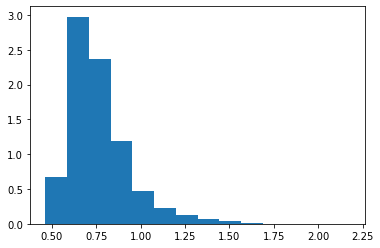

In [217]:
plt.hist(bt_asymmetry, bins=k, density = True)
plt.show()